# COLA

Update the particle positions and velocities using the COLA method.

**cola_kick**(*particles*, *a_vel*)
> Update the particle velocities to those at scale factor *a_vel*

**cola_drift**(*particles*, *a_pos*)
> Update the particle positions to those at scale factor *a_pos*

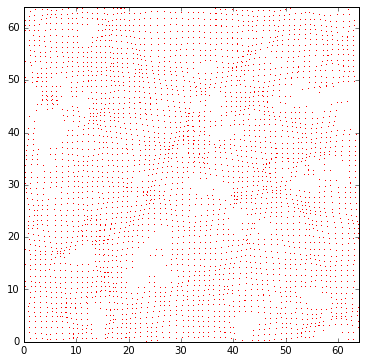

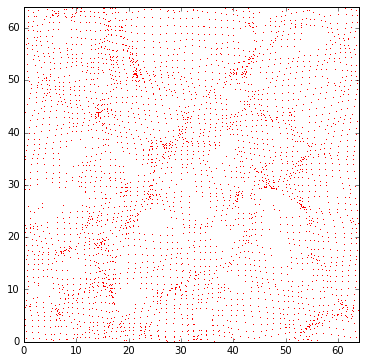

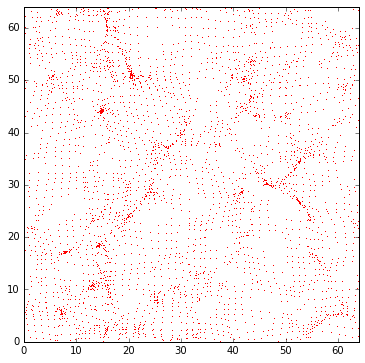

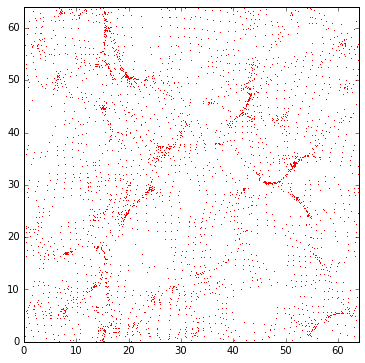

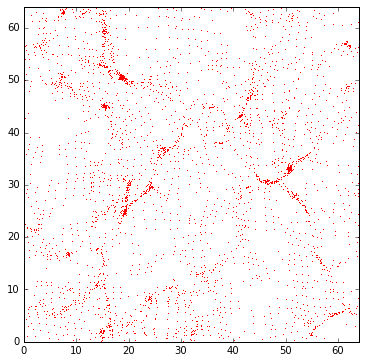

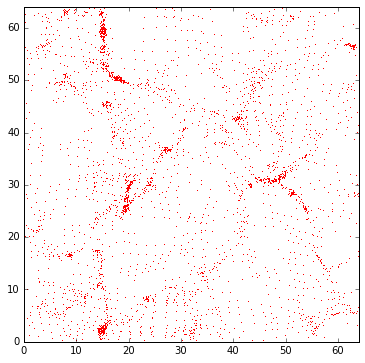

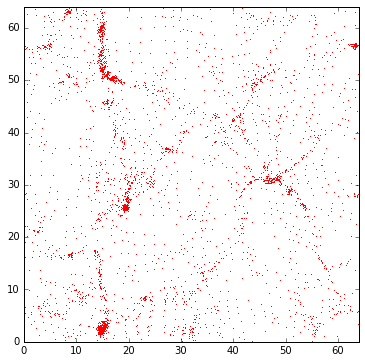

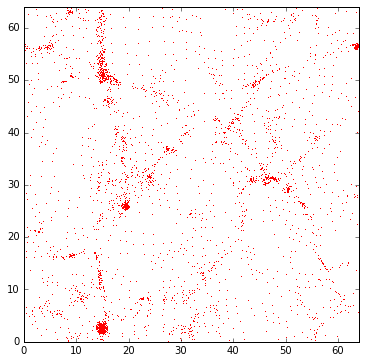

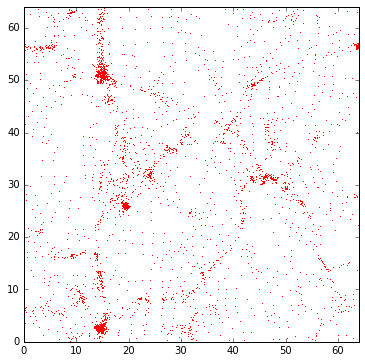

(1, 1)


SystemError: <built-in function _particles_getitem> returned NULL without setting an error

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import fs

omega_m = 0.308
nc = 64
nc_pm = nc
boxsize = 64
a_init = 0.1
a_final = 1.0
seed = 1
nstep = 9

fs.cosmology_init(omega_m)
ps = fs.PowerSpectrum('../data/planck_matterpower.dat')

particles = fs.lpt(nc, boxsize, a_init, ps, seed)

fs.pm_init(nc_pm, nc_pm/nc, boxsize)

for i in range(nstep):
    a_vel = a_init + (a_final - a_init)/nstep*(i + 0.5)
    fs.pm_compute_force(particles)
    fs.cola_kick(particles, a_vel)
    
    p = particles.slice(1/nc)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim(0, boxsize)
    ax.set_ylim(0, boxsize)
    plt.plot(p[:,0], p[:,1], 'r,');
    plt.show()
    
    a_pos = a_init + (a_final - a_init)/nstep*(i + 1.0)
    fs.cola_drift(particles, a_pos)

